# EDA - Analisis de datos exploratorio



## Planteo del Problema
El problema que vamos a tratar de resolver es de **predecir** un **heart attack** en un **adulto**.

## Conjunto de datos
Los datos provienen de la página  [Kaggle: Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import time
# from itertools import cycle
# import warnings
# warnings.filterwarnings('ignore')


In [2]:
#definimos la semilla
semilla = 42

In [3]:
#Obtenemos el nombre de las variables
### Cambiar nombre

heart = pd.read_csv('../data/raw/heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### **Glosario** 
----------------

About this dataset.

**Age :** Age of the patient

**Sex :** Sex of the patient

**exang:** exercise induced angina (1 = yes; 0 = no)

**ca:** number of major vessels (0-3)

**cp :** Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
**trtbps :** resting blood pressure (in mm Hg)

**chol :** cholestoral in mg/dl fetched via BMI sensor

**fbs :** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg :** resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
**thalach :** maximum heart rate achieved

**target :**
* 0= less chance of heart attack
* 1= more chance of heart attack

In [4]:
# Validamos si algunas de las variables tiene valores nulos.
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart.isna().sum().sort_values(ascending = False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
# Observamos la informacion del dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Casteamos las variables a categóricas, aquellas que si lo son.
heart = heart.astype({"sex":"category", "cp":"category", 'fbs':"category", 'restecg':"category", 'exng':"category",
                      'slp':"category", 'caa':"category", 'thall':"category", 'output':"category"})
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


### 1. Análsis Exploratorio


#### Gráfico de la relación entre la posición y el salario
Veamos como es la distribución de salarios según la posición de juego. Se agregan las etiquetas de los jugadores que cobran mayores sueldos **buscar forma de agregar labels no muy compleja**

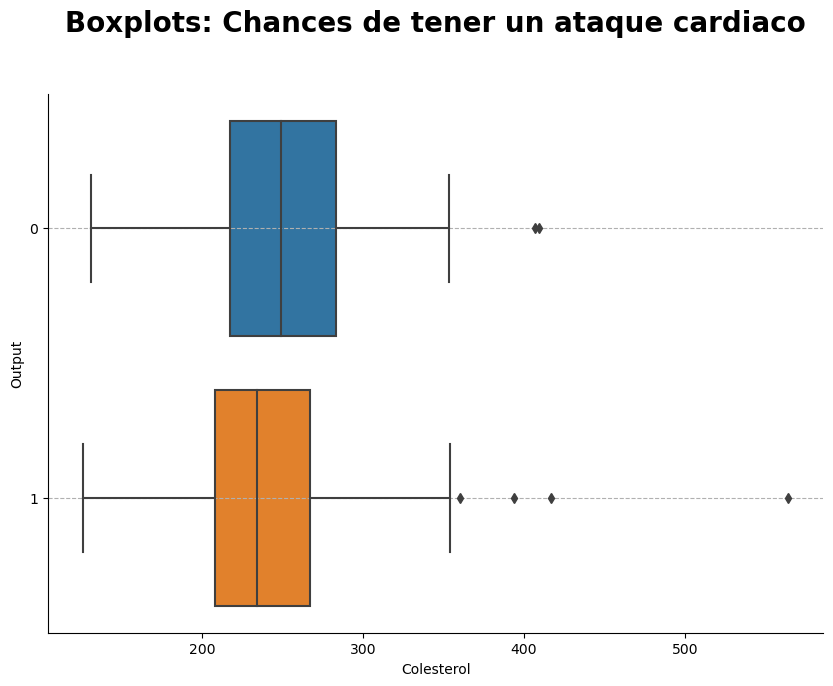

In [12]:
# Graficamos la relacion entre las posicion y el salario del jugador

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(x="chol", y="output", data=heart)
ax.set_title('Boxplots: Chances de tener un ataque cardiaco', fontweight='bold', fontsize=20, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('Output', fontsize=10)
ax.set_xlabel('Colesterol', fontsize=10)
plt.show()

#### VARIABLES CATEGÓRICAS

In [28]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 16, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

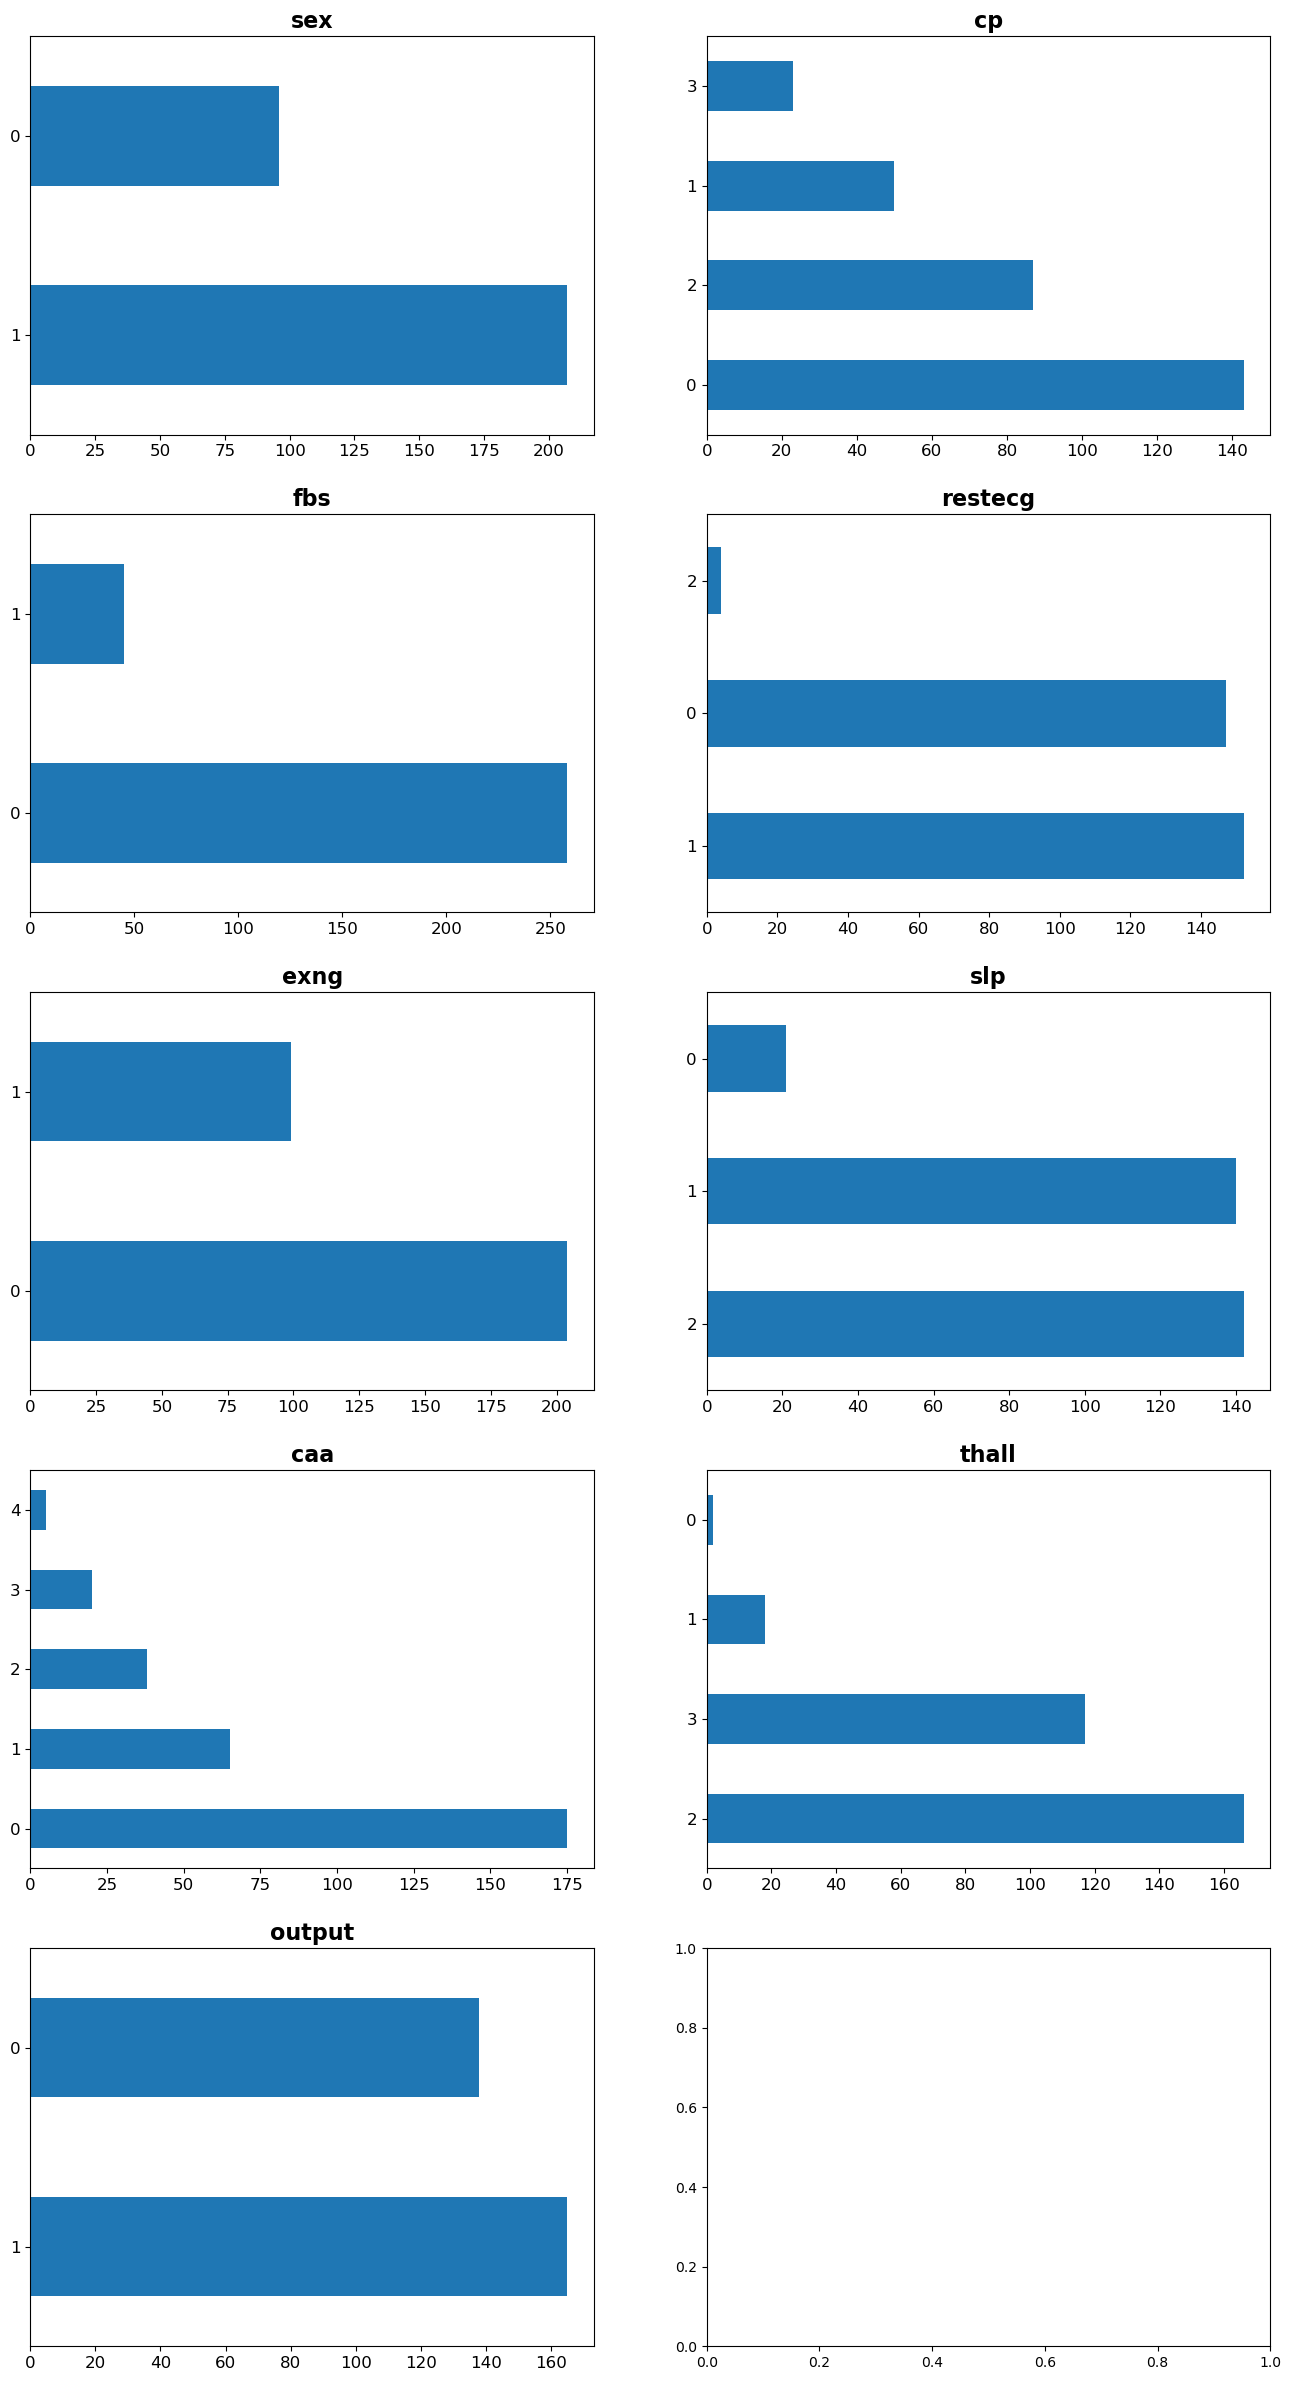

In [29]:
graficos_eda_categoricos(heart.select_dtypes('category'))

Observamos que la distribucion varía un poco entre las posiciones y hay varios sujetos que son outliers.

#### Correlograma
Realizamos un correlograma entre todas las variables cuantitativas

In [ ]:
# Obtenemos las variables numericas y generamos la matriz de correlacion
nba_numericas = nba.select_dtypes(include=['float64','int64'])
matriz_correlacion = nba_numericas.corr()

In [ ]:
matriz_correlacion

In [ ]:
# Graficamos la correlacion entre las variables

mask = np.zeros_like(matriz_correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(17, 17))

heatmap = sns.heatmap(matriz_correlacion,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(matriz_correlacion.columns, rotation = 0)
ax.set_xticklabels(matriz_correlacion.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Observamos que existen relaciones de diversa magnitud y signo entre todas las variables.

### Analisis de Distribución, Scatterplot y correlación de algunas variables

In [ ]:
#Seleccionamos algunas variables y graficamos su correlacion

nba_numericas_seleccion = nba_numericas[['salary','age','pts_per_g','gs','ast_per_g','blk_per_g']]

def corr(x, y, **kwargs):

    # Calculamos el valor de la correlacion
    coef = np.corrcoef(x, y)[0][1]
    # Generamos la etiqueta
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Agregamos la etiqueta al grafico
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


# Mapeamos los graficos en las ubicaciones correspondientes
g = sns.PairGrid(nba_numericas_seleccion)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(corr)

Se puede observar que el **salario** se correlaciona de forma positiva con todas las variables.
Tambien se puede ver una **correlacion positiva** entre los **pts_per_g** (puntos por partido) y **ast_per_g** (asistencia por partido)

## Modelo Lineal

Vamos a ajustar un modelo lineal que incluya todas las variables (excepto el nombre del jugaodr y del equipo) y obtendremos todos los parámetros del modelo junto al valor de su intervalo de confianza

$E(salario|.) = \beta_0 + \beta_1 \cdot age + \beta_2 \cdot g + ... + \beta_n \cdot position\_SG$

#### Creación de las variables dummies

Para crear las variables dummies vamos a utilizar el transformer (es un tipo de clase) [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Los argumentos que vamos a utilizar son:

* `categories:` la lista de categorías que tiene la variable categórica
* `drop='first'`: indica que se va a "tirar" la primera categoría (es la que queda contenida en el intercepto)

### Coeficientes estimados

Creamos el modelo y accedemos a la información de los coeficientes

In [ ]:
# Eliminamos las variables del nombre del jugador y el equipo
nba_lineal = nba.drop(['player','team_id'], axis = 1)

In [ ]:
# Seleccionamos las variables numericas
nba_lineal_numericas = nba_lineal.select_dtypes(include=['float64','int64'])

In [ ]:
# Seleccionamos las variables categoricas y las convertimos en dummies
nba_lineal_cat = nba_lineal.select_dtypes(include=['object'])


In [ ]:
nba_lineal_cat['position'].unique()

In [ ]:
nba_lineal_cat

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Definimos una instancia del transformer
one_hot_encoder = OneHotEncoder(categories=[['PG', 'SG', 'PF', 'SF', 'C']], drop='first')

In [ ]:
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(nba_lineal_cat[['position']])

In [ ]:
# Accedemos a las categorias del encoder
one_hot_encoder.categories_

In [ ]:
 # Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
 matriz_dummies = one_hot_encoder.transform(nba_lineal_cat[['position']]).toarray()
 matriz_dummies

In [ ]:
# Generamos los nombres de las variables dummies (notemos que tenemos 2 columnas!)
nombres_dummies = one_hot_encoder.get_feature_names_out(['position'])
nombres_dummies

In [ ]:
# Generamos el dataframe con las variables dummies con las matrices y columnas
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=nba_lineal_cat.index)
df_dummies.head()

In [ ]:
# Separamos las variables predictoras de la que va a ser preditcha 'salary'
nba_lineal = pd.concat([nba_lineal_numericas, df_dummies],axis=1)
X = nba_lineal.drop(['salary'], axis = 1)
reg_features = X.columns
y = nba_lineal['salary']


In [ ]:
# Import el paquete sm de la libreria stats
import statsmodels.api as sm
from statsmodels.api import add_constant

In [ ]:
# Construimos el modelo agregando una constante
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [ ]:
# Error Cuadratico Medio de los Residuos
print(f"ECM: {results.mse_resid}")

In [ ]:
# Visualizamos el ajuste final
print(results.summary())

In [ ]:
def coef_summary(results):
    '''
    Toma los resultado del modelo de OLS

    Elimina el intercepto.
    '''
    # Creo un dataframe de los resultados del summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Agrego el nombre de las columnas
    coef_df.columns = coef_df.iloc[0]

    # Elimino la fila extra del intercepto
    coef_df=coef_df.drop(0)

    # Seteo el nombre de las variables como index
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Convertimos a float los object
    coef_df = coef_df.astype(float)

    # Obtenemos el error; (coef - limite inferior del IC)
    errors = coef_df['coef'] - coef_df['[0.025']

    # Agregamos los errores al dataframe
    coef_df['errors'] = errors

    # Eliminamos la variable const
    coef_df = coef_df.drop(['const'])

    # Ordenamos los coeficientes
    coef_df = coef_df.sort_values(by=['coef'])

    ### Graficamos ###

    # x-labels
    variables = list(coef_df.index.values)

    # Agregamos la columna con el nombre de las variables
    coef_df['variables'] = variables

    return  coef_df

In [ ]:
# Aplicamos la funcion coef_summary a los results

coef_df = coef_summary(results)

Graficamos los p-valores de mayor a menor para evaluar la significatividad individual de los coeficientes

In [ ]:
# Graficamos los p-valor
fig, ax = plt.subplots(figsize=(10,7))
coef_df = coef_df.sort_values(by='P>|t|', ascending = False)
ax = sns.barplot(x='variables', y='P>|t|', data=coef_df,
                 palette="Spectral")
ax.set_title('P-valor de los regresores', fontweight='bold', fontsize=20, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('P-valor', fontsize=10)
ax.set_xlabel('variables', fontsize=10)
plt.xticks(rotation=90, fontsize = 10 )
plt.yticks( fontsize = 10 )
plt.axhline(y = 0.05, color = 'black', linestyle = '--')
plt.show()

Notamos que:

* Solo algunas variables tienen coeficientes significativos: **gs**,  **pf_per_g**, **ast_per_g**, **g**, **position_SG**, **fg3a_per_g**, **fg2a_per_g**, **fga_per_g**, **position_PG**, **stl_per_g**, **age**

Para evitar los problemas que puede introducir la escala, reescalamos las variables y repetimos el ajuste para estos nuevos datos


In [ ]:
#Importamos StandardScaler de la libreria sklear
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instanciamos la funcion para escalar
scaler = StandardScaler()

In [ ]:
# Seleccionamos las variables numericas
nba_lineal = nba.drop(['player','team_id'], axis = 1)
nba_lineal_numericas = nba_lineal.select_dtypes(include=['float64','int64'])
# Eliminamos la variable salary del escalado
nba_lineal_numericas= nba_lineal_numericas.drop(['salary'], axis = 1)
nba_lineal_numericas_columns = nba_lineal_numericas.columns

In [ ]:
#Escalamos las variables
scaled = scaler.fit_transform(nba_lineal_numericas)

In [ ]:
# Generamos un dataframe con las variables escaladas
nba_lineal_numericas = pd.DataFrame(scaled, columns = nba_lineal_numericas_columns)

In [ ]:
# Generamos dummies con las variables categoricas
nba_lineal_cat = nba_lineal.select_dtypes(include=['object'])
nba_lineal_cat = pd.get_dummies(nba_lineal_cat)


In [ ]:
nba_lineal_cat

In [ ]:
# Generamos el conjunto de datos para ajustar el modelo
nba_lineal = pd.concat([nba_lineal_numericas, df_dummies],axis=1)
X = nba_lineal.copy()
y = nba['salary']

In [ ]:
# Construimos el modelo agregando una constante
X = sm.add_constant(X)
model_scaled = sm.OLS(y,X)
results_scaled = model_scaled.fit()

In [ ]:
# Error Cuadratico Medio de los Residuos
print(f"ECM: {results_scaled.mse_resid}")

In [ ]:
# Visualizamos el ajuste final
print(results_scaled.summary())

In [ ]:
#Graficamos los coeficientes al 95% de confianza
coef_df_scaled = coef_summary(results_scaled)

In [ ]:
# Graficamos los p-valor
fig, ax = plt.subplots(figsize=(10,7))
coef_df_scaled = coef_df_scaled.sort_values(by='P>|t|', ascending = False)
ax = sns.barplot(x='variables', y='P>|t|', data=coef_df_scaled,
                 palette="Spectral")
ax.set_title('P-valor de los regresores', fontweight='bold', fontsize=20, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('P-valor', fontsize=10)
ax.set_xlabel('variables', fontsize=10)
plt.xticks(rotation=90, fontsize = 10 )
plt.yticks( fontsize = 10 )
plt.axhline(y = 0.05, color = 'black', linestyle = '--')
plt.show()

In [ ]:
print(f"MSE Scaled: {results_scaled.rsquared}",'vs.',f"MSE: {results.rsquared}" )
print(f"Adj MSE Scaled: {results_scaled.rsquared_adj}",'vs.',f" Adj MSE: {results.rsquared_adj}" )
print(f"p-value Scaled: {results_scaled.f_pvalue}",'vs.',f" p-value: {results.f_pvalue}" )

La alta cantidad de variables y la existencia de una alta correlación entre varias de ellas ocasionan que los coeficientes estimados tengan alta varianza y que muchos de ellos no sean significativos en términos estadísticos. Las técnicas de **regularización** pueden ayudarnos a mejorar esta situación.

##3. Regularización

La librería scikit-learn (sklearn) nos permite trabajar con modelos Ridge, Lasso y Elastic Net. Para cada uno de ellas tendremos una función particular para poder llevar adelante el cálculo

**Fórmula**

*ECM* + $\lambda$ [ $\alpha$ $\Sigma_{j}$|$\beta_{j}$| + (1-$\alpha$) $\Sigma_{j}$$\beta_{j}^{2}$]

$\lambda$ controla toda la penalidad, mientras que $\alpha$ controla la penalidad de la **Elastic Net** y actua como un puente entre **Lasso** y **Ridge**

Con el parámentro $\alpha$ indicamos con qué tipo de modelo deseamos trabajar:
* Ridge: $\alpha$ = 0
* Lasso: $\alpha$ = 1
*Elastic Net: 0 < $\alpha$ < 1

### 3.1 Partición Train y Test
Realizamos una partición entre dataset de entrenamiento y de testeo con la función *train_test_split* de la librería *sklearn*

In [ ]:
# Importamos la funcion trai_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Preparamos el conjunto de datos

nba_reg = nba.drop(['player','team_id'], axis = 1)
nba_reg_numericas = nba_reg.select_dtypes(include=['float64','int64'])
nba_reg_numericas_columns = nba_reg_numericas.columns

nba_reg_object = df_dummies.copy()
nba_reg = pd.concat([nba_reg_numericas, nba_reg_object],axis=1)

X = nba_reg.drop(['salary'], axis = 1)
y = nba_reg['salary']

In [ ]:
# Separamos el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

### 3.2 Lasso
Es un tipo de regularización la cual utiliza la penalización lineal mediante el valor absoluto. La magnitud de la penalización viene dada por el parámetro $\lambda$. Si lo pensamos mediante la formula de *ElasticNet* estariamos utilizando un $\alpha$ = 1. Para esto vamos a utilizar la función [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) de sklearn

$\hat{\beta_L}= arg min_\beta\sum_{i=1}^{n}(y_i-\beta_0-\sum_{j=p}^{n}\beta_jx_{ji})^{2}+\lambda\sum_{j=p}^{n}|\beta_j|$

1. Cuál es la penalización que introduce el modelo Lasso?
1. Cómo impacta esto en las variables?

In [ ]:
# Importamos la funcion Lasso
from sklearn.linear_model import Lasso

Vamos a ver como se van modificando las variables para distintos valores de $\lambda$ para eso vamos a establecer a generar un número de $\lambda$ y luego lo vamos a graficar

In [ ]:
# generamos 50 lambdas para evaluar los distintos escenarios
n_alphas = 50
alphas = np.logspace(-5, 7.2, n_alphas)

In [ ]:
# Ajustamos  la regresion Lasso para los disntos valores de lambda que establecimos
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

In [ ]:
#Graficamos como varian las variables cuando se aumenta el lambda

fig, ax = plt.subplots(figsize=(10,7))

l1 = plt.plot(alphas, coefs,linewidth=2 )

ax.set_title('Regularización Lasso', fontweight='bold', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('coeficientes', fontsize=10)
ax.set_xlabel('Log(lambda)', fontsize=10)

plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

plt.show()

Como la regularización *Lasso* tambien puede ser utilizada como selector de variables, vamos a quedarnos con aquellas variables que sobreviven al proceso final de selección.

In [ ]:
# Nos quedamos con las variables que sobreviven al proceso de selección
coeficientes = pd.DataFrame(coefs, columns =X_train.columns)

variables_importantes = coeficientes.loc[:,X_train.columns[coeficientes.loc[45:].any().values]]

In [ ]:
# Graficamos nuevamente
fig, ax = plt.subplots(figsize=(10,7))

l1 = plt.plot(alphas, variables_importantes,linewidth=2 )

ax.set_title('Regularización Lasso', fontweight='bold', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(coeficientes.columns, fontsize=10)
ax.set_ylabel('coeficientes', fontsize=10)
ax.set_xlabel('Log(lambda)', fontsize=10)

plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

plt.show()

Los métods de regularización no son invariante a la magnitud de los datos. Por este movito es importante standarizar las variables

In [ ]:
# Instanciamos la funcion para escalar
scaler = StandardScaler()

In [ ]:
# Seleccionamos las variables numericas que vamos a escalar
nba_reg = nba.drop(['player','team_id'], axis = 1)
nba_reg_numericas = nba_reg.select_dtypes(include=['float64','int64'])
nba_reg_numericas_columns = nba_reg_numericas.columns

In [ ]:
# Escalamos las variables
scaled = scaler.fit_transform(nba_reg_numericas)
nba_reg_numericas = pd.DataFrame(scaled, columns = nba_reg_numericas_columns)

In [ ]:
# Conformamos el nuevo conjunto de entrenamiento
nba_reg = pd.concat([nba_reg_numericas, df_dummies],axis=1)

X = nba_reg.drop(['salary'], axis = 1)
y = nba_reg['salary']


In [ ]:
#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

In [ ]:
# Ajsutamos nuevamente las distintas regresiones Lasso para los alphas planteados
n_alphas = 50
alphas = np.logspace(-5, 0, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

In [ ]:
# Graficamos los resultados

fig, ax = plt.subplots(figsize=(10,7))

l1 = plt.plot(alphas, coefs,linewidth=2 )

ax.set_title('Regularización Lasso', fontweight='bold', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('coeficientes', fontsize=10)
ax.set_xlabel('Log(lambda)', fontsize=10)

plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

plt.show()

Nuevamente seleccionamos aquellas variables que sobreviven al proceso de selección,

In [ ]:
#Seleccionamos las variables que sobreviven mayor tiempo al proceso de seleccion
coeficientes = pd.DataFrame(coefs, columns =X_train.columns)

variables_importantes = coeficientes.loc[:,X_train.columns[coeficientes.loc[40:].any().values]]


In [ ]:
# Graficamos
fig, ax = plt.subplots(figsize=(10,7))

l1 = plt.plot(alphas, variables_importantes,linewidth=2 )

ax.set_title('Regularización Lasso', fontweight='bold', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(coeficientes.columns, fontsize=10)
ax.set_ylabel('coeficientes', fontsize=10)
ax.set_xlabel('Log(lambda)', fontsize=10)

plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

plt.show()

Una de las formas de obtener un $\lambda$ optimo es utiliznado la técnica de **Cross-Validation**.

Esta técnica consiste en partir en k partes el dataset de entrenamiento. El modelo se entrena con k-1 conjuntos y se evalua con el que fue dejado fuera. Este proceso se realiza k veces (folds) y el resultado final es el promedio de todos los entrenamientos.

En este caso ajustaremos 20 veces el modelo Lasso utilizando la función [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html?highlight=lassocv#sklearn.linear_model.LassoCV) y graficaremos la evolución del Error Cuadrático Medio para los distintos valores de $\lambda$

In [ ]:
# Importamos Lasso CV
from sklearn.linear_model import LassoCV

In [ ]:
# Ajustamos el modelo mediante Cross-Validation
t1 = time.time()
lasso = LassoCV(cv=20).fit(X_train, y_train)
t_lasso_cv = time.time() - t1

In [ ]:
# Graficamos

EPSILON = 1e-4

fig, ax =plt.subplots(figsize=(10,7))
plt.semilogx(lasso.alphas_ + EPSILON, lasso.mse_path_, ':')
l1 =plt.plot(lasso.alphas_ + EPSILON, lasso.mse_path_.mean(axis=-1), 'k',
         label='Promedio entre folds', linewidth=2)
ax.axvline(lasso.alpha_ + EPSILON, linestyle='--', color='k',
            label='lambda: CV estimado')

ax.legend(fontsize=10)

ax.set_xlabel(r'$\lambda$', fontsize=10)
ax.set_ylabel('Error Cuadratico Medio', fontsize=10)
ax.set_title('Error cuadratico medio en cada fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv, fontweight='bold', fontsize=20)
plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [ ]:
print(f"El lambda final obtenido mediante CV es: {lasso.alpha_}" )

Visualizamos los nuevos coeficientes luego de la regularización

In [ ]:
coeficientes_finales = pd.DataFrame([np.array(X_train.columns.tolist()),lasso.coef_]).T
coeficientes_finales.columns = ['feature','coeficiente']
coeficientes_finales

In [ ]:
print(f"El modelo final cuenta con : {coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]}",' features' )

### 3.3 Ridge

Es una técnica de regularización que utiliza una penalización cuadrática:

$\hat{\beta_L}= arg min_\beta\sum_{i=1}^{n}(y_i-\beta_0-\sum_{j=p}^{n}\beta_jx_{ji})^{2}+\lambda\sum_{j=p}^{n}\beta_j^{2}$

Pensandolo en términos de *ElasticNet* estaríamos en el caso de $\alpha$=0. Para hacer este ajuste utilizarmos la función [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge). Vamos a replicar lo que ya realizamos con Lasso

In [ ]:
#Importamos el modelo
from sklearn.linear_model import Ridge

In [ ]:
# Ajustamos el modelo para distintos valores de lambda
n_alphas = 30
alphas = np.logspace(-5,0, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

In [ ]:
# Graficamos

fig, ax = plt.subplots(figsize=(10,7))

l1 = plt.plot(alphas, coefs,linewidth=2 )

ax.set_title('Regularización Ridge', fontweight='bold', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('coeficientes', fontsize=10)
ax.set_xlabel('Log(lambda)', fontsize=10)

plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

plt.show()

Vamos a utilizar la función [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html?highlight=ridgecv#sklearn.linear_model.RidgeCV) de la librería *sklearn* para mediante Cross-Validation obtener el $\lambda$ óptimo

In [ ]:
#Importamos el modelo
from sklearn.linear_model import RidgeCV

In [ ]:
# Ajustamos el modelo para 100 valores distintos de lambda
n_alphas = 100
alphas = np.logspace(1,5, n_alphas)
ridge = RidgeCV(alphas=alphas, store_cv_values=True).fit(X_train, y_train)

Si queremos almacenar la evolución del ECM en RidgeCV debemos pasar el parámetro *store_cv_values=True*. Haciendo esto no podemos controlar el *k* del cv. Para poder visualizar mejor vamos a seleccionar 20 particiones aleatorias del total que realizo RidgCV

In [ ]:
#La funcion RidgeCV no permite controlar la cantidad de k seleccionamos 20 al azar
number_of_rows = ridge.cv_values_.shape[0]
random_indices = np.random.choice(number_of_rows,
                                  size=20,
                                  replace=False)
row = ridge.cv_values_[random_indices, :]

In [ ]:
# Graficamos
fig, ax =plt.subplots(figsize=(10,7))

plt.semilogx(ridge.alphas + EPSILON, row.T, ':')
l1 =plt.plot(ridge.alphas + EPSILON,row.T.mean(axis=-1), 'k',
         label='Promedio entre folds', linewidth=2)
ax.axvline(ridge.alpha_ + EPSILON, linestyle='--', color='k',
            label='lambda: CV estimado')

ax.legend(fontsize=10)

ax.set_xlabel(r'$\lambda$', fontsize=10)
ax.set_ylabel('Error Cuadratico Medio', fontsize=10)
ax.set_title('Error cuadratico medio en cada fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv, fontweight='bold', fontsize=20)
plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Seleccion del Lambda optimo

In [ ]:
print(f"El lambda final obtenido mediante CV es: {ridge.alpha_}" )

Visualizamos los nuevos coeficientes luego de la regularización

In [ ]:
coeficientes_finales = pd.DataFrame([np.array(X_train.columns.tolist()),ridge.coef_]).T
coeficientes_finales.columns = ['feature','coeficiente']
coeficientes_finales

### 3.4 Elastic Net

El modelo de Elastic Net incopora los dos tipos de penalización: Lasso (Norma L1) y Ridge (Norma L2). Define un compromiso entre las penalidades de lasso y ridge. El parámetro $\alpha$ regula la importancia de cada penalización, cuanto más cerca de cero será más importante la penalización del tipo Ridge y más cerca de 1, la del tipo Lasso.

*ECM* + $\lambda$ [ $\alpha$ $\Sigma_{j}$|$\beta_{j}$| + (1-$\alpha$) $\Sigma_{j}$$\beta_{j}^{2}$]


En este caso aplicaremos un modelo con un $\alpha$=0.5. Para poder visualizar la evolución de las variables en función de $\lambda$ vamos a utilizar la funcion [enet_path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.enet_path.html?highlight=enet_path#sklearn.linear_model.enet_path)

In [ ]:
#Importamos la funcion enet_path
from sklearn.linear_model import enet_path

In [ ]:
#Ajsutamos el modelo
eps = 5e-3
alphas_enet, coefs_enet, _ = enet_path(X_train, y_train, eps=eps, l1_ratio=0.5)


In [ ]:
#Definimos todos los colores que vamos a utilizar para poder graficar
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
np.random.shuffle(sorted_names)

In [ ]:
#Graficamos
eps = 5e-3
fig, ax =plt.subplots(figsize=(10,7))
colors = cycle(sorted_names[:30])

neg_log_alphas_enet = -np.log10(alphas_enet)
for  coef_e, c in zip(coefs_enet, colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

ax.set_xlabel('-Log(alpha)',fontsize = 10)
ax.set_ylabel('coefficients',fontsize = 10)
ax.set_title('Elastic-Net Paths', fontweight='bold', fontsize=20)

plt.axis('tight')

plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Para la obtención del $\lambda$ óptimo vamos a utilizar nuevamente la estrategia de **Cross-Validation**. Para eso utilizaremos la función [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html?highlight=elasticnetcv#sklearn.linear_model.ElasticNetCV)

In [ ]:
#Importamos el modelo
from sklearn.linear_model import ElasticNetCV

In [ ]:
#Ajustamos el modelo
enet = ElasticNetCV(cv=20).fit(X_train, y_train)


In [ ]:
#Graficamos
EPSILON = 1e-4


fig, ax =plt.subplots(figsize=(10,7))
plt.semilogx(enet.alphas_ + EPSILON, enet.mse_path_, ':')
l1 =plt.plot(enet.alphas_ + EPSILON, enet.mse_path_.mean(axis=-1), 'k',
         label='Promedio entre folds', linewidth=2)
ax.axvline(enet.alpha_ + EPSILON, linestyle='--', color='k',
            label='lambda: CV estimado')

ax.legend(fontsize=10)

ax.set_xlabel(r'$\lambda$', fontsize=10)
ax.set_ylabel('Error Cuadratico Medio', fontsize=10)
ax.set_title('Error cuadratico medio en cada fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv, fontweight='bold', fontsize=20)
plt.xticks(fontsize = 10 )
plt.yticks( fontsize = 10 )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Obtenemos el lambda óptimo

In [ ]:
print(f"El lambda final obtenido mediante CV es: {enet.alpha_}" )

Visualizamos los nuevos coeficientes luego de la regularización

In [ ]:
coeficientes_finales = pd.DataFrame([np.array(X_train.columns.tolist()),enet.coef_]).T
coeficientes_finales.columns = ['feature','coeficiente']
coeficientes_finales

In [ ]:
print(f"El modelo final cuenta con : {coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]}",' features' )

### 3.5 Comparación de Modelos

Para comparar los distintos modelos lo que vamos a hacer es realizar predicciones mediante la método *.predict()* y evaluarlas con la función [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error)

In [ ]:
#importamos la metrica
from sklearn.metrics import mean_squared_error

In [ ]:
# Computamos el ECM tomando como modelo al promedio de los salarios
promedio = np.repeat(y_train.mean(), y_train.shape[0])
mse_promedio = mean_squared_error(y_train, promedio)

In [ ]:
#Importamos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

#Ajustamos el modelo
model_scaled_lineal = LinearRegression()
model_scaled_lineal = model_scaled_lineal.fit(X_train, y_train)

#Obtenemoos las predicciones y el ECM del modelo de regresion lineal
y_pred_lineal = model_scaled_lineal.predict(X_train)
mse_lineal = mean_squared_error(y_train, y_pred_lineal)

In [ ]:
#Obtenemos el ECM de la regresion Lasso

y_pred_lasso = lasso.predict(X_train)
mse_lasso = mean_squared_error(y_train, y_pred_lasso)

In [ ]:
#Obtenemos el ECM de la regresion Ridge
y_pred_ridge = ridge.predict(X_train)
mse_ridge = mean_squared_error(y_train, y_pred_ridge)

In [ ]:
#Obtenemos el ECM de ElasticNet

y_pred_enet = enet.predict(X_train)
mse_enet = mean_squared_error(y_train, y_pred_enet)


In [ ]:
#Ordenamos los datos y los acomodamos en un dataframe
modelo = ['promedio', 'lineal','lasso','ridge','enet']
metrica = np.repeat('ecm', 5)
error = [mse_promedio, mse_lineal, mse_lasso, mse_ridge, mse_enet]
columns = ['modelo', 'metrica', 'valor']
data = np.array([modelo, metrica, error]).T
pd.DataFrame(data=data, columns=columns)

Ahora vamos a evaluar los modelos en el conjunto de Test

In [ ]:
# Computamos el ECM tomando como modelo al promedio de los salarios
promedio = np.repeat(y_test.mean(), y_test.shape[0])
mse_promedio = mean_squared_error(y_test, promedio)

In [ ]:
#Obtenemoos las predicciones y el ECM del modelo de regresion lineal
y_pred_lineal = model_scaled_lineal.predict(X_test)
mse_lineal = mean_squared_error(y_test, y_pred_lineal)

In [ ]:
#Obtenemos el ECM de la regresion Lasso
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [ ]:
#Obtenemos el ECM de la regresion Ridge
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


In [ ]:
#Obtenemos el ECM de ElasticNet
y_pred_enet = enet.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)

In [ ]:
#Ordenamos los datos y los acomodamos en un dataframe
y_pred_enet = enet.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)

modelo = ['promedio', 'lineal','lasso','ridge','enet']
metrica = np.repeat('ecm', 5)
error = [mse_promedio, mse_lineal, mse_lasso, mse_ridge, mse_enet]
columns = ['modelo', 'metrica', 'valor']
data = np.array([modelo, metrica, error]).T
pd.DataFrame(data=data, columns=columns)

## 4. Optimización de Hiperparámetros

Los **hiperparametros** no se obtienen mediante el proceso de ajuste, sino que son definición propia del modelo por parte de quien lo esta llevando adelante. La elección de los mismos va a tener una injerencia significativa en el desempeño del modelo ya que por ejemplo pueden ayudar a prevenir el *sobreajuste* o *overfitting*

En el caso particular de los modelos que estuvimos viendo en esta sección los hiperparámetros serán:
* $\lambda$: cuantifica la magnitud de la penalización o regularización a aplicar
* $\alpha$: balancea el tipo de penalidad que vamos a aplicar. Actua como un puente entre *Ridge* ($\alpha$=0) y *Lasso* ($\alpha$=1)



### 4.1 Búsqueda de Grilla o Grid-search

Tal como indica su nombre la Búsqueda de Grilla se lleva adelante generando una matriz con los distintos valores de los parámetros que deseamos evaluar. Esto implica que la cantidad de iteraciones vendrá dada por todas las posibles combinaciones de los valores de los parámetros que indicamos en la grilla.

En nuestro caso vamos a evaluar esta estrategia sobre el modelo *Elastic Net*. Para eso vamos a utilizar la función [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) de la librería *sklearn*.
Para conformar la grilla a evaluar debemos generar un diccionario cuyas 'keys' van a ser los nombres de los parámetros y una lista de los valores para cada uno de ellos

In [ ]:
# Importamos el modelo
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  ElasticNet

In [ ]:
#Definimos la grilla
parametros = {'alpha':[0.001,0.01,0.1,1,10,100],
               'l1_ratio':[0,0.25,0.5,0.75,1]}

In [ ]:
# Definimos el modelo
enet = ElasticNet()

grid_search = GridSearchCV(estimator = enet, param_grid = parametros, cv = 20, scoring ='neg_mean_squared_error')

In [ ]:
#Ajustamos el modelo
start_time = time.time()
grid_search.fit(X_train, y_train)

tiempo_grid = (time.time() - start_time)
print("Tiempo de ejecucion %s segundos ---\n" % tiempo_grid)
print('Mejor combinación de parámetros %s \n'% grid_search.best_params_)
print('Definición del Modelo %s '% grid_search.best_estimator_)

In [ ]:
#Obtenemos la combinacion total de parametros
import itertools as it

diccionario_parametros = sorted(parametros)
combinaciones = it.product(*(parametros[Name] for Name in diccionario_parametros))
combinacioes_realizadas = pd.DataFrame(combinaciones, columns=['lambda', 'alpha'])
combinacioes_realizadas

In [ ]:
print('Cantidad de combinaciones evaluadas %s '% combinacioes_realizadas.shape[0])

In [ ]:
#Mostramos los coeficientes fianles
coeficientes_finales_grid = pd.DataFrame([np.array(X_train.columns.tolist()),grid_search.best_estimator_.coef_]).T
coeficientes_finales_grid.columns = ['feature','coeficiente']
coeficientes_finales_grid

In [ ]:
print(f"El modelo final cuenta con : {coeficientes_finales_grid[coeficientes_finales_grid['coeficiente']!=0].shape[0]}",' features' )

### 4.2 Búsqueda aleatoria o Random Search

Es una estrategia de búsqueda que realiza combinaciones aleatorias de los parámetros a partir de una definición de la distribución de los mismos por parte del usuario. A diferencia de la Búsqueda de Grilla, la Búsqueda aleatoria requiere que el usuario establezca la cantidad de combinaciones que se van a realizar.

Vamos a utilizar la función [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) tambien de sklearn. Al igual que en el caso de la Búsqueda de Grilla, debemos generar un diccionario con las distribuciones de los parámetros a evaluar.

In [ ]:
#Importamos el modelo y algunas funciones auxiliares
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
import scipy.stats as stats

In [ ]:
# Definimos los parametros
parametros={'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}
n_iteraciones = 15
semilla = 2021

In [ ]:
#Ajustamos el modelo
start_time = time.time()


enet_random = ElasticNet()
random_search = RandomizedSearchCV(estimator = enet_random, n_iter = n_iteraciones, param_distributions = parametros,
                                   cv = 20, scoring ='neg_mean_squared_error', random_state = semilla )
random_search.fit(X_train, y_train)
tiempo_random = (time.time() - start_time)

print("Tiempo de ejecucion %s segundos ---\n" % tiempo_random)
print('Mejor combinación de parámetros %s \n'% random_search.best_params_)
print('Definición del Modelo %s \n'% random_search.best_estimator_)
print('Combinaciones Evaluadas %s '% n_iteraciones)

In [ ]:
#Visualizamos los coeficientes
coeficientes_finales_random = pd.DataFrame([np.array(X_train.columns.tolist()),random_search.best_estimator_.coef_]).T
coeficientes_finales_random.columns = ['feature','coeficiente']
coeficientes_finales_random

In [ ]:
print(f"El modelo final cuenta con : {coeficientes_finales_random[coeficientes_finales_random['coeficiente']!=0].shape[0]}",' features' )

### 4.3 Comparación de Optimizadores

In [ ]:
#Computamos el ECM del Grid Search
y_pred_grid = grid_search.best_estimator_.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)

In [ ]:
#Computamos el ECM del Random Search
y_pred_random = random_search.best_estimator_.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)

In [ ]:
#Organizamos la informacion en un dataframe
estrategia = ['GridSearch', 'RandomSearch']
tiempo = [tiempo_grid, tiempo_random]
metrica = np.repeat('ecm', 2)
error = [mse_grid, mse_random]
iteraciones = [combinacioes_realizadas.shape[0], n_iteraciones ]
folds = [20,20]
n_variables = [ coeficientes_finales_grid[coeficientes_finales_grid['coeficiente']!=0].shape[0], coeficientes_finales_random[coeficientes_finales_random['coeficiente']!=0].shape[0]]
columns = ['estregia','tiempo', 'metrica', 'valor', 'combinaciones', 'folds', 'n_variables']
data = np.array([estrategia, tiempo, metrica, error, iteraciones, folds, n_variables]).T
pd.DataFrame(data=data, columns=columns)

## 5. Feature Engineering

Vamos a cargar nuevamente el conjutno de datos para poder operar las distintas transformaciones que deseemos.

In [ ]:
nba = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/nba_salarios_2021.csv')

### 5.1 Imputación de datos faltantes

La imputación de datos faltantes puede hacerse mediante distitnas estrategias:

**Variables Numéricas**
* Media: completar los nulos con la media de la columna
* Mediana: completar los nulos con la mediana de la columna
* Media Condicionada: los nulos se completan con la media condicionada respecto a alguna otra columna.

**Variables Numéricas o Categóricas**
* Valor más frecuente: se completa con el valor que más veces se repite en la columna
* Valor Constante: se completa con algun valor que se desee

Para poder hacerlo vamos a utilizar la función [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [ ]:
#Observamos cuantos datos faltantes hay en cada columna
nba.isnull().sum()

In [ ]:
#Generamos un par de nulos en la posicion para poder imputar categoricas
nba['position'] = np.where(nba['salary'].isnull(),np.nan, nba['position'])

In [ ]:
# Visualizamos los casos con faltantes
nba[nba['salary'].isnull()]

In [ ]:
# Importamos la funcion
from sklearn.impute import SimpleImputer

In [ ]:
# Separamos las variables categoricas y nulas con faltantes para poder tener una mejor visualizacion
numericas = nba[['salary']]
categoricas = nba[['position']]


Procedemos a hacerlo con las variables numéricas

In [ ]:
# Imputamos con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(numericas[['salary']])
numericas['media']=imputer.transform(numericas[['salary']])

In [ ]:
# Imputamos con la mediana
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(numericas[['salary']])
numericas['mediana']=imputer.transform(numericas[['salary']])

In [ ]:
# Imputamos con un valor constante
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 99999)
imputer.fit(numericas[['salary']])
numericas['constante']=imputer.transform(numericas[['salary']])

In [ ]:
# Imputamos con el valor mas frecuente
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(numericas[['salary']])
numericas['mas_frecuente']=imputer.transform(numericas[['salary']])

In [ ]:
# Visualizamos el resultado de las distintas estraegias
numericas[numericas['salary'].isnull()]

Ahora lo hacemos con las variables categoricas

In [ ]:
# Imputamos con un valor constante
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 'S/D')
imputer.fit(categoricas[['position']])
categoricas['constante']=imputer.transform(categoricas[['position']])

In [ ]:
# Imputamos con el valor mas frecuente
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(categoricas[['position']])
categoricas['mas_frecuente']=imputer.transform(categoricas[['position']])

In [ ]:
categoricas[categoricas['position'].isnull()]

### 5.2 Binning

Es una estrategia que se utiliza para agrupar en bins  los registros en función de cierto criterio. Con esto se resigna variabilidad en las variables pero se gana robustez en el modelo general.


**Numéricas**


Vamos a armar bins a partir del valor de los salarios para eso vamos a usar la funcion *qcut*

In [ ]:
# Generamos 10 bins
nba['salario_bins'] = pd.qcut(nba['salary'], q = 10)
nba[['salary','salario_bins']]

  **Categoricas**



Vamos a reemplazar todas aquellas posiciones multiples. Para eso vamos a utilizar la funcion *np.where*

In [ ]:
#Observamos lso valores que puede tomar la variable position
nba.position.value_counts()

In [ ]:
#Reemplazamos los valores que representan multiples posiciones
nba['posicion_agrup'] = np.where(nba['position'].isin(['SG','C','PF','SF','PG']),nba['position'], 'Otro')
nba['posicion_agrup'].value_counts()

### 5.3 One-hot Encoding
Dada una variable categórica con N filas y M categorías, mediante el One-hot-encoding la variable se va a expresar como una matriz de N filas por M columnas (NxM). En donde cada columna representa una de las categorías de la variable original y están codificadas con los valores 1 y 0.

Esto lo podemos llevar adelante con la función [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotenco#sklearn.preprocessing.OneHotEncoder) o la función [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de pandas

In [ ]:
#realizamos el One-hot Encoding con get_dummies
pd.get_dummies(nba['position'])

In [ ]:
#Importamos OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Imputamos los datos faltantes porque no debe contener nans
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(nba[['position']])
nba['position']=imputer.transform(nba[['position']])

In [ ]:
#Ajustamos el encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(nba[['position']])

In [ ]:
#Generamos las dummies
dummies = enc.transform(nba[['position']])
pd.DataFrame(dummies.toarray())

### 5.4 Agrupación

Mediante la agrupación se puede  generar nuevas variables resumiendo de la información de distintas observaciones y agrupandolas según algún criterio que surte a partir de otra/otras variables. La función que utilizaremos es [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [ ]:
# Calculamos la media de las variables salary y fga_per_g por posicion
nba.groupby('position').agg({'salary':'mean', 'fga_per_g' :'mean'})

In [ ]:
# Calculamos la media de las variables salary y fga_per_g por posicion y equipo
nba.groupby(['position','team_id']).agg({'salary':'mean', 'fga_per_g' :'mean'})

In [ ]:
# Calculamos la media, el minimo, maximo y la sumo de la variable salary
nba.groupby('position').agg(min_salary=('salary', 'min'),
                            max_salary=('salary', 'max'),
                            media_salary = ('salary', 'mean'),
                            suma_salary = ('salary', 'sum'))

### 5.5 Escalado de Datos

Hay algoritmos que son sonsibles a la magnitud de los datos, por eso se vuelve relevalante escalarlos y llevarlos todos al mismo rango. Para existo se utilizan principalmente dos strategias

* Normalización: $X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$

* Estandarización: $X_{std} = \frac{X-\mu}{\sigma}$

Donde $\mu$ y $\sigma$ son la media y el desvío standard de la distribución de la variable a estandarizar.

Para la estandarizacion vamos a utilizar [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler) y para la normalización [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler) ambas de *sklearn*


In [ ]:
#generamos un dataframe que sea solo la columna salario
salario = nba[['salary']]

In [ ]:
# Vamos a normalizar la variable salario
# Importamos la función
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Ajustamos el escalado
scaler = MinMaxScaler()
scaler.fit(salario[['salary']])

In [ ]:
#Realizamos la normalizacion
salario['norm'] = scaler.transform(salario[['salary']])

In [ ]:
salario

In [ ]:
# Vamos a estandarizar la variable salario
# Importamos la función
from sklearn.preprocessing import StandardScaler

In [ ]:
#Ajustamos el escalado
scaler = StandardScaler()
scaler.fit(salario[['salary']])

In [ ]:
#Realizamos la estandarización
salario['std'] = scaler.transform(salario[['salary']])

In [ ]:
#vemos como quedaron las distitnas alternativas
salario

In [ ]:
#Vemos la distribucion
salario.describe()


## 6. Pipelines

Un pipeline es *‘Una lista de transformaciones aplicadas de forma secuencial sobre el estimador. Los pasos intermedios deben ser “transforms” es decir, implementan los métodos fit y transform. El estimador final sólo necesita implementar el fit’*.

Vamos a usar la función [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) a la cual le debemos pasar una lista de tuplas de procedimientos que queremos realizar.

Trabajaremos con variables numericas para ejemplificar el procedimiento

In [ ]:
#Seleccionamos las variables numéricas
nba_numericas = nba.select_dtypes(include=['float64','int64'])
nba_numericas.head()

In [ ]:
#Eliminamos los registros que no poseen salario
nba_numericas = nba_numericas[nba_numericas['salary'].notnull()]
# Separamos la variable target de las predictoras
X = nba_numericas.drop(['salary'], axis=1)
y = nba_numericas[['salary']]

In [ ]:
# Separamos en train y en test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

In [ ]:
# Definimos el diccionario con los pasos que queremos que tenga el pipeline en este caso StandardScaler y ElasticNet

pasos = [('scaler', StandardScaler()), ('enet', ElasticNet())]

In [ ]:
#Importamos la funcion Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# Definimos el objeto que va a contener nuestro pipeline
pipeline = Pipeline(pasos)

In [ ]:
# Como vamos a ealphajecutar una busqueda de grilla definimos los parametros a evaluar
#debemos poner el nombre del estimador seguido de __ y luego el parametro
parametros = {'enet__alpha':[0.001,0.01,0.1,1,10,100],
               'enet__l1_ratio':[0,0.25,0.5,0.75,1]}

In [ ]:
# Instanciamos la búsqueda de grilla pasandole el pipeline que deseamos que ejecute

grid = GridSearchCV(pipeline, param_grid=parametros, cv=20, scoring= 'neg_mean_squared_error')

In [ ]:
# Ajustamos nuestro modelo al conjunto de entramiento
grid.fit(X_train, y_train)

In [ ]:
#Obtenemos el mejor Score del modelo
print ("score = %3.2f" %(grid.score(X_test,y_test)))

In [ ]:
#Imprimimos los mejores parametros
print( grid.best_params_)


Si quisieramos incorporar el imputer en caso de tener registros sin datos los pasos que debieramos pasarles serian los siguientes:

In [ ]:
#Agregamos un imputador con una estrategia de media
pasos = [('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler()), ('enet', ElasticNet())]

In [ ]:
# Definimos el objeto que va a contener nuestro pipeline
pipeline = Pipeline(pasos)

In [ ]:
# Como vamos a ealphajecutar una busqueda de grilla definimos los parametros a evaluar
#debemos poner el nombre del estimador seguido de __ y luego el parametro
parametros = {'enet__alpha':[0.001,0.01,0.1,1,10,100],
               'enet__l1_ratio':[0,0.25,0.5,0.75,1]}

In [ ]:
# Instanciamos la búsqueda de grilla pasandole el pipeline que deseamos que ejecute

grid = GridSearchCV(pipeline, param_grid=parametros, cv=20, scoring= 'neg_mean_squared_error')

In [ ]:
# Ajustamos nuestro modelo al conjunto de entramiento
grid.fit(X_train, y_train)